<h1>D2.4.42 Analytics</h1>

<h3>For other D40 Series Relese analytics check Below links</h3>
<a href="Analytics/D2.4.40_Deployment_analytics.html">D2.4.40</a>&nbsp;&nbsp;&nbsp;
<a href="Analytics/D2.4.41_Deployment_analytics.html">D2.4.41</a>&nbsp;&nbsp;&nbsp;
<a href="Analytics/D2.4.42_Deployment_analytics.html">D2.4.42</a>&nbsp;&nbsp;&nbsp;
<a href="Analytics/D2.4.43_Deployment_analytics.html">D2.4.43</a>&nbsp;&nbsp;&nbsp;
<a href="Analytics/D2.4.44_Deployment_analytics.html">D2.4.44</a>&nbsp;&nbsp;&nbsp;
<a href="Analytics/D2.4.45_Deployment_analytics.html">D2.4.45</a>&nbsp;&nbsp;&nbsp;
<a href="Analytics/D2.4.46_Deployment_analytics.html">D2.4.46</a>&nbsp;&nbsp;&nbsp;
<a href="Analytics/D2.4.47_Deployment_analytics.html">D2.4.47</a>&nbsp;&nbsp;&nbsp;
<a href="Analytics/D2.4.48_Deployment_analytics.html">D2.4.48</a>&nbsp;&nbsp;&nbsp;
<a href="Analytics/D2.4.49_Deployment_analytics.html">D2.4.49</a>

In [1]:
import pandas as pd 
import numpy as np

In [2]:
data = pd.read_csv('D2.4.42.csv')

In [3]:
data['EOD_Duration'] = data['EOD_Duration'].astype(float)
data['Replication_Duration'] = data['Replication_Duration'].astype(float)
data['Dep_Duration'] = data['Dep_Duration'].astype(float)


### Deployment Date

D2.4.42 was rolled out on 

In [4]:
date = data['Date'].head(1)
date_Deployed = date.to_string().replace("0    "," ")
print(date_Deployed)

 22/11/2017


### Regions Deployed

D2.4.42 was Deployed on the Below Regions 

In [5]:
region_rolled_out = data.Country.unique()
for elements in region_rolled_out:
    print(elements)

England  UK
Wales  UK
Channel Islands
Scotland  UK
Northern Ireland  UK
Isle of Man


### Max EOD Time

In [6]:
maxEOD = data[['Name','EOD_Duration']].where(data['EOD_Duration'] == data['EOD_Duration'].max())
maxEOD.dropna()

,Name,EOD_Duration
34,Bedford,28354.0


<h3> Min EOD Time </h3>

In [7]:
data['EOD_Duration'] = data['EOD_Duration'].replace(0,np.nan)
min_EOD = data[['Name','EOD_Duration']].where (data['EOD_Duration'] == data['EOD_Duration'].min())
min_EOD.dropna()

,Name,EOD_Duration
721,Downpatrick,1851.0


### Total failed EOD

In [8]:
data['EOD_Duration'] = data['EOD_Duration'].replace(np.nan,0)
minEOD = data[['Name','EOD_Duration']].where(data['EOD_Duration'] == data['EOD_Duration'].min())
minEOD = minEOD.dropna()
TotalfailedEOD = len(minEOD)
print(TotalfailedEOD,"number of stores didn't ran EOD")

108 number of stores didn't ran EOD


<h3> Total successful EOD</h3>

In [9]:
data['EOD_Duration'] = data['EOD_Duration'].replace(np.nan,0)
maxEOD = data[['Name','EOD_Duration']].where(data['EOD_Duration'] != data['EOD_Duration'].min())
maxEOD = maxEOD.dropna()
TotalsuccessfulEOD = len(maxEOD)
print(TotalsuccessfulEOD,"number of stores have successful EOD")

668 number of stores have successful EOD


<h3> Average EOD Time</h3>

In [10]:
import math
MeanEOD = data['EOD_Duration'].mean()
print('The average time taken for the EOD is ',math.ceil(MeanEOD),'seconds')

The average time taken for the EOD is  4707 seconds


<h3>EOD success Failure Distribution</h3>

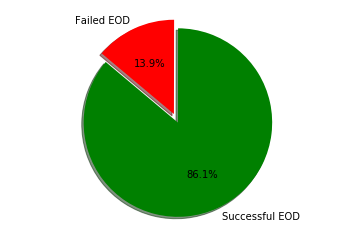

In [12]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Successful EOD', 'Failed EOD'
sizes = [TotalsuccessfulEOD,TotalfailedEOD]
colors = ['Green', 'Red']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

<h3>Max replication time</h3>

In [13]:
maxRep = data[['Name','Replication_Duration']].where(data['Replication_Duration'] == data['Replication_Duration'].max())
maxRep.dropna()

,Name,Replication_Duration
485,Batley,8034.0


<h3>Min replication time</h3>

In [14]:
data['Replication_Duration'] = data['Replication_Duration'].replace(0,np.nan)
min_Rep = data[['Name','Replication_Duration']].where (data['Replication_Duration'] == data['Replication_Duration'].min())
min_Rep.dropna()

,Name,Replication_Duration
367,Girlington,99.0
441,Honiton,99.0


<h3>Total failed Replication</h3>

In [15]:
data['Replication_Duration'] = data['Replication_Duration'].replace(np.nan,0)
minRep = data[['Name','Replication_Duration']].where(data['Replication_Duration'] == data['Replication_Duration'].min())
minRep = minRep.dropna()
Totalreplicationfailed = len(minRep) 
print(Totalreplicationfailed,"number of stores didn't ran Replication")

45 number of stores didn't ran Replication


<h3>Total successful Replication</h3>

In [17]:
data['Replication_Duration'] = data['Replication_Duration'].replace(np.nan,0)
maxRep = data[['Name','Replication_Duration']].where(data['Replication_Duration'] != data['Replication_Duration'].min())
maxRep = maxRep.dropna()
Totalreplicationsuccessful = len(maxRep) 
print(Totalreplicationsuccessful,"number of stores ran successful Replication")

731 number of stores ran successful Replication


<h3>Average Replication Time</h3>

In [18]:
MeanRep = data['Replication_Duration'].mean()
print('The average time taken for the Replication is ',math.ceil(MeanRep),'seconds')

The average time taken for the Replication is  281 seconds


<h3>Replication success failure Distributiom</h3>

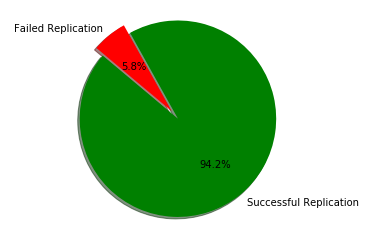

In [19]:
labels = 'Successful Replication', 'Failed Replication'
sizes = [Totalreplicationsuccessful,Totalreplicationfailed]
colors = ['Green', 'Red']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

<h3>Max Deployment time</h3>

In [20]:
maxDep = data[['Name','Dep_Duration']].where(data['Dep_Duration'] == data['Dep_Duration'].max())
maxDep.dropna()

,Name,Dep_Duration
542,East Grinstead,8953.0


<h3>Minimun Deployment time</h3>

In [21]:
data['Dep_Duration'] = data['Dep_Duration'].replace(0,np.nan)
min_Dep = data[['Name','Dep_Duration']].where (data['Dep_Duration'] == data['Dep_Duration'].min())
min_Dep.dropna()

,Name,Dep_Duration
750,Deepdale,21.0


<h3>Total failed Deployments</h3>

In [22]:
data['Dep_Duration'] = data['Dep_Duration'].replace(np.nan,0)
min_Dep = data[['Name','Dep_Duration']].where (data['Dep_Duration'] == data['Dep_Duration'].min())
minDep = min_Dep.dropna()
totalfailedDeployment = len(minDep)
print(totalfailedDeployment,"number of stores where artifacts didn't got deployed")

136 number of stores where artifacts didn't got deployed


<h3>Total successful Deployments</h3>

In [23]:
max_Dep = data[['Name','Dep_Duration']].where (data['Dep_Duration'] != data['Dep_Duration'].min())
maxDep = max_Dep.dropna()
totalsuccessfulDeployment = len(maxDep)
print(totalsuccessfulDeployment,"number of stores where artifacts got deployed successfully")

640 number of stores where artifacts got deployed successfully


<h3>Average deployment time</h3>

In [24]:
MeanDep = data['Dep_Duration'].mean()
print('The average time taken for the Deployment is ',math.ceil(MeanDep),'seconds')

The average time taken for the Deployment is  103 seconds


<h3>Deployment success failure Distribution</h3>

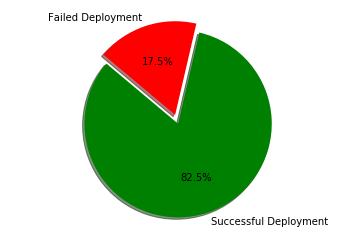

In [25]:
# Data to plot
labels = 'Successful Deployment', 'Failed Deployment'
sizes = [totalsuccessfulDeployment,totalfailedDeployment]
colors = ['Green', 'Red']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [26]:
#data['Replication_Duration'] = data['Replication_Duration'].replace(np.nan,0)
#maxRep = data[['Name','Replication_Duration']].where(data['Replication_Duration'] != data['Replication_Duration'].min())
#maxRep = maxRep.dropna()
import pandas_profiling
profile_report = pandas_profiling.ProfileReport(data)
profile_report.to_file('D2.4.42_DrillDown.html')
#profile_report.to_html()
#Totalreplicationsuccessful = len(maxRep) 
#print(Totalreplicationsuccessful,"number of stores didn't ran Replication")

<a href="Analytics/D2.4.42_DrillDown.html">Drill Down for more Analytics</a>